In [1]:

import pandas as pd
import numpy as np
import os
import matplotlib_inline
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from app.configs.const import FILEPATH
from darts.models import CatBoostModel

import warnings

# import warnings
# from warnings import Warning

# # Suppress ValueWarning
# warnings.filterwarnings("ignore", category=Warning)

# Your code here


# !pip install -r requirements.txt

c:\Users\sms_7\Desktop\Machine Learning 556\New folder\Predictive-Modeling-Olympic-Medal-Trend\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Sample Testing Forcasting Module

# Explorotory Data Analysis

In [3]:
winter_data_df = pd.read_csv(FILEPATH['winter_data'])
summar_data_df = pd.read_csv(FILEPATH['summar_data'])
dictionary_data_df = pd.read_csv(FILEPATH['dictionary_data'])
winter_data_merged_df = pd.merge(
    winter_data_df, dictionary_data_df, left_on='Country', right_on='Code')
summar_data_merged_df = pd.merge(
    summar_data_df, dictionary_data_df, left_on='Country', right_on='Code')

summar_data_merged_df.to_csv("summar_data_merged_df.csv", index=False)
summar_data_merged_df

,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y,Code,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,HUN,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,AUT,8611088.0,43774.985174
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,GRE,10823732.0,18002.230578
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,GRE,10823732.0,18002.230578
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,GRE,10823732.0,18002.230578
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25737,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze,Poland,POL,37999494.0,12554.547554
25738,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold,Iran,IRI,79109272.0,NaN
25739,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver,Russia,RUS,144096812.0,9092.580536
25740,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze,Armenia,ARM,3017712.0,3489.127690


In [6]:
winter_data_merged_df['Year'].min()

1924

In [5]:
summar_data_merged_df['Year'].min()

1896

In [8]:
summar_data_merged_df['Population'].max()
summar_data_merged_df['Population'].min()

65235.0

In [ ]:
# Categorize GDP per capita
bins_gdp = [-float('inf'), 10000, 30000, float('inf')]
labels_gdp = ['Low Income', 'Middle Income', 'High Income']
summar_data_merged_df['GDP Category'] = pd.cut(
    summar_data_merged_df['GDP per Capita'], bins=bins_gdp, labels=labels_gdp
)

# Categorize Population
bins_pop = [0, 1e7, 5e7, float('inf')]
labels_pop = ['Small Population', 'Medium Population', 'Large Population']
summar_data_merged_df['Population Category'] = pd.cut(
    summar_data_merged_df['Population'], bins=bins_pop, labels=labels_pop
)

# Group by categories and calculate total medals
medal_analysis = summar_data_merged_df.groupby(['GDP Category', 'Population Category', 'Country_y'])['Medal'].count().reset_index()

# Identify top countries with high medal counts
top_medal_countries = medal_analysis.sort_values('Medal', ascending=False).head(10)


/tmp/ipykernel_11676/1493262063.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medal_analysis = summar_data_merged_df.groupby(['GDP Category', 'Population Category', 'Country_y'])['Medal'].count().reset_index()


In [6]:
summar_data_merged_df

,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y,Code,Population,GDP per Capita,GDP Category,Population Category
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,HUN,9844686.0,12363.543460,Middle Income,Small Population
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,AUT,8611088.0,43774.985174,High Income,Small Population
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,GRE,10823732.0,18002.230578,Middle Income,Medium Population
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,GRE,10823732.0,18002.230578,Middle Income,Medium Population
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,GRE,10823732.0,18002.230578,Middle Income,Medium Population
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25737,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze,Poland,POL,37999494.0,12554.547554,Middle Income,Medium Population
25738,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold,Iran,IRI,79109272.0,NaN,NaN,Large Population
25739,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver,Russia,RUS,144096812.0,9092.580536,Low Income,Large Population
25740,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze,Armenia,ARM,3017712.0,3489.127690,Low Income,Small Population


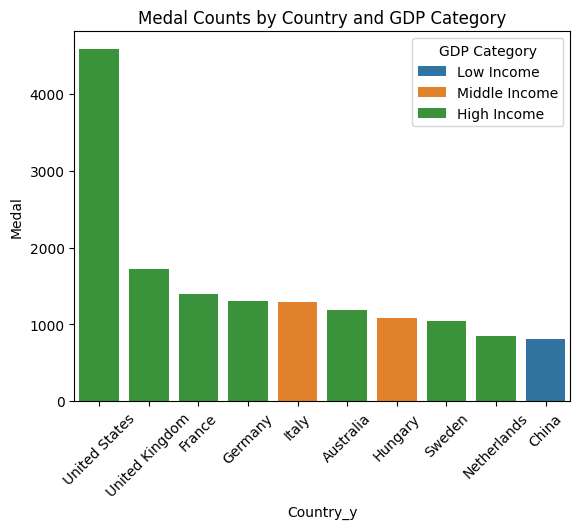

/tmp/ipykernel_11676/2372044866.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = medal_analysis.pivot_table(


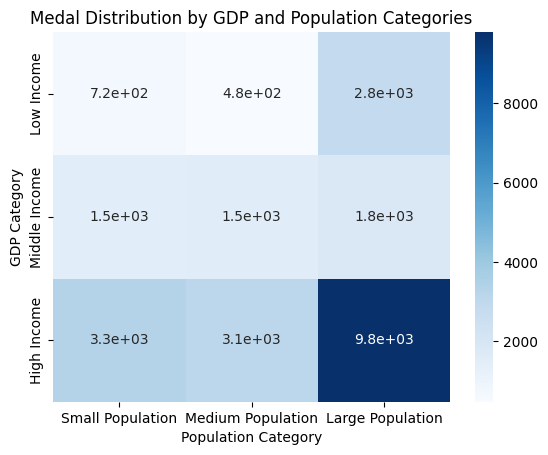

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for top countries
sns.barplot(data=top_medal_countries, x='Country_y', y='Medal', hue='GDP Category')
plt.title('Medal Counts by Country and GDP Category')
plt.xticks(rotation=45)
plt.show()

# Heatmap for population vs GDP categories
heatmap_data = medal_analysis.pivot_table(
    index='GDP Category', columns='Population Category', values='Medal', aggfunc='sum'
)
sns.heatmap(heatmap_data, annot=True, cmap='Blues')
plt.title('Medal Distribution by GDP and Population Categories')
plt.show()


## Year

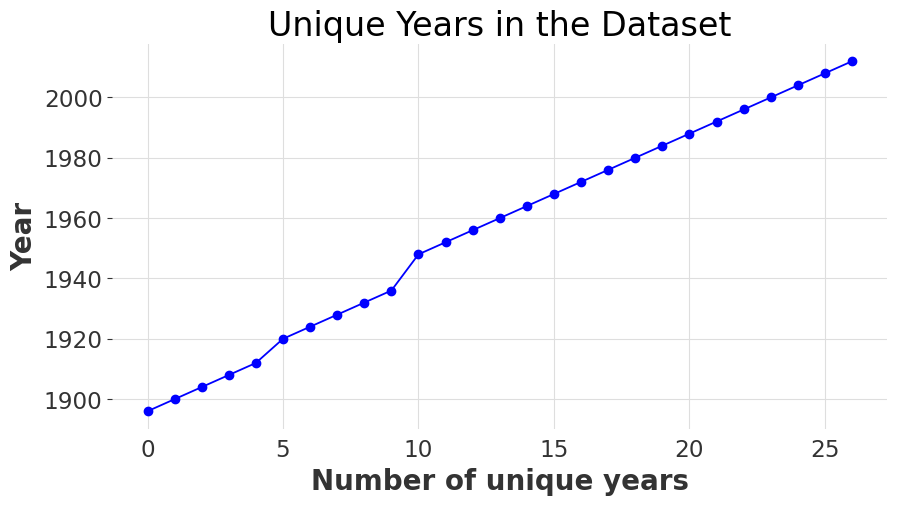

In [ ]:
unique_years = summar_data_merged_df['Year'].unique()

# Sort the unique years for better visualization
unique_years.sort()

# Plot the unique years
plt.figure(figsize=(10, 5))
plt.plot(unique_years, marker='o', linestyle='-', color='b')
plt.title('Unique Years in the Dataset')
plt.xlabel('Number of unique years')
plt.ylabel('Year')
plt.grid(True)
plt.show()

## Country 

In [25]:
summar_data_merged_df['Code'].unique()

array(['HUN', 'AUT', 'GRE', 'USA', 'GER', 'GBR', 'FRA', 'AUS', 'DEN',
       'SUI', 'NED', 'BEL', 'IND', 'CAN', 'SWE', 'NOR', 'ESP', 'ITA',
       'CUB', 'RSA', 'FIN', 'EST', 'NZL', 'BRA', 'JPN', 'LUX', 'ARG',
       'POL', 'POR', 'URU', 'HAI', 'EGY', 'PHI', 'IRL', 'CHI', 'LAT',
       'MEX', 'TUR', 'PAN', 'JAM', 'SRI', 'KOR', 'PUR', 'PER', 'IRI',
       'TRI', 'VEN', 'BUL', 'LIB', 'ISL', 'PAK', 'BAH', 'TPE', 'ETH',
       'MAR', 'GHA', 'IRQ', 'SIN', 'TUN', 'KEN', 'NGR', 'UGA', 'CMR',
       'MGL', 'PRK', 'COL', 'NIG', 'THA', 'BER', 'TAN', 'GUY', 'ZIM',
       'CHN', 'CIV', 'ZAM', 'DOM', 'ALG', 'SYR', 'SUR', 'CRC', 'INA',
       'SEN', 'DJI', 'AHO', 'ISV', 'NAM', 'QAT', 'LTU', 'MAS', 'CRO',
       'ISR', 'SLO', 'RUS', 'UKR', 'ECU', 'BDI', 'MOZ', 'CZE', 'BLR',
       'TGA', 'KAZ', 'UZB', 'SVK', 'MDA', 'GEO', 'HKG', 'ARM', 'AZE',
       'BAR', 'KSA', 'KGZ', 'KUW', 'VIE', 'MKD', 'SCG', 'ERI', 'PAR',
       'UAE', 'SUD', 'MRI', 'TOG', 'TJK', 'AFG', 'BRN', 'GUA', 'GRN',
       'BOT', 'CYP',

In [ ]:
total_counteries = len(summar_data_merged_df['Country_y'].unique())
print('Total Countries: %d' % total_counteries)

summar_data_merged_df['Country_y'].unique()

Total Countries: 129


array(['Hungary', 'Austria', 'Greece', 'United States', 'Germany',
       'United Kingdom', 'France', 'Australia', 'Denmark', 'Switzerland',
       'Netherlands', 'Belgium', 'India', 'Canada', 'Sweden', 'Norway',
       'Spain', 'Italy', 'Cuba', 'South Africa', 'Finland', 'Estonia',
       'New Zealand', 'Brazil', 'Japan', 'Luxembourg', 'Argentina',
       'Poland', 'Portugal', 'Uruguay', 'Haiti', 'Egypt', 'Philippines',
       'Ireland', 'Chile', 'Latvia', 'Mexico', 'Turkey', 'Panama',
       'Jamaica', 'Sri Lanka', 'Korea, South', 'Puerto Rico*', 'Peru',
       'Iran', 'Trinidad and Tobago', 'Venezuela', 'Bulgaria', 'Lebanon',
       'Iceland', 'Pakistan', 'Bahamas', 'Taiwan', 'Ethiopia', 'Morocco',
       'Ghana', 'Iraq', 'Singapore', 'Tunisia', 'Kenya', 'Nigeria',
       'Uganda', 'Cameroon', 'Mongolia', 'Korea, North', 'Colombia',
       'Niger', 'Thailand', 'Bermuda*', 'Tanzania', 'Guyana', 'Zimbabwe',
       'China', "Cote d'Ivoire", 'Zambia', 'Dominican Republic',
       'Alger

## Sports

In [32]:
summ_count_sports = summar_data_merged_df['Sport'].unique()
summ_count_sports

array(['Aquatics', 'Athletics', 'Cycling', 'Fencing', 'Gymnastics',
       'Shooting', 'Tennis', 'Weightlifting', 'Wrestling', 'Archery',
       'Basque Pelota', 'Cricket', 'Croquet', 'Equestrian', 'Football',
       'Golf', 'Rowing', 'Rugby', 'Sailing', 'Tug of War', 'Boxing',
       'Lacrosse', 'Roque', 'Hockey', 'Jeu de paume', 'Polo', 'Rackets',
       'Skating', 'Water Motorsports', 'Modern Pentathlon', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak', 'Handball', 'Judo', 'Volleyball',
       'Table Tennis', 'Badminton', 'Baseball', 'Softball', 'Taekwondo',
       'Triathlon', 'Canoe'], dtype=object)

In [ ]:
winter_count_sports = winter_data_merged_df['Sport'].unique()

winter_count_sports

array(['Biathlon', 'Bobsleigh', 'Curling', 'Ice Hockey', 'Skating',
       'Skiing', 'Luge'], dtype=object)

## Discipline 

In [ ]:
summer_count_sports = summar_data_merged_df['Discipline'].unique()
summer_count_sports

array(['Swimming', 'Athletics', 'Cycling Road', 'Cycling Track',
       'Fencing', 'Artistic G.', 'Shooting', 'Tennis', 'Weightlifting',
       'Wrestling Gre-R', 'Water polo', 'Archery', 'Basque Pelota',
       'Cricket', 'Croquet', 'Jumping', 'Football', 'Golf', 'Rowing',
       'Rugby', 'Sailing', 'Tug of War', 'Diving', 'Boxing', 'Lacrosse',
       'Roque', 'Wrestling Free.', 'Hockey', 'Jeu de Paume', 'Polo',
       'Rackets', 'Figure skating', 'Water Motorspor', 'Dressage',
       'Eventing', 'Modern Pentath.', 'Vaulting', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak F', 'Handball', 'Judo', 'Volleyball',
       'Canoe / Kayak S', 'Synchronized S.', 'Rhythmic G.',
       'Table Tennis', 'Badminton', 'Baseball', 'Mountain Bike',
       'Softball', 'Beach volley.', 'Trampoline', 'Taekwondo',
       'Triathlon', 'BMX', 'Marathon swimming', 'Synchronized Swimming',
       'Water Polo', 'Canoe Slalom', 'Canoe Sprint', 'Cycling BMX',
       'Gymnastics Artistic', 'Gymnastics Rhythmi

In [ ]:
winter_count_sports = winter_data_merged_df['Discipline'].unique()
winter_count_sports

array(['Biathlon', 'Bobsleigh', 'Curling', 'Ice Hockey', 'Figure skating',
       'Speed skating', 'Cross Country Skiing', 'Nordic Combined',
       'Ski Jumping', 'Skeleton', 'Alpine Skiing', 'Luge',
       'Short Track Speed Skating', 'Freestyle Skiing', 'Snowboard'],
      dtype=object)

## Event


In [39]:
summer_count_events = summar_data_merged_df['Event'].unique()
print(f"Number of events: {len(summer_count_events)}")
summer_count_sports

Number of events: 666


array(['100M Freestyle', '100M Freestyle For Sailors', '1200M Freestyle',
       '400M Freestyle', '100M', '110M Hurdles', '1500M', '400M', '800M',
       'Discus Throw', 'High Jump', 'Long Jump', 'Marathon', 'Pole Vault',
       'Shot Put', 'Triple Jump', 'Individual Road Race', '100KM', '10KM',
       '12-Hour Race', '1KM Time Trial', 'Sprint Indivual',
       'Foil Individual', 'Foil, Masters', 'Sabre Individual',
       'Horizontal Bar', 'Parallel Bars', 'Pommel Horse', 'Rings',
       'Rope Climbing', 'Team, Horizontal Bar', 'Team, Parallel Bars',
       'Vault', '25M Army Pistol', '25M Rapid Fire Pistol (60 Shots)',
       '50M Pistol (60 Shots)', 'Army Rifle, 200M', 'Army Rifle, 300M',
       'Singles', 'Heavyweight - One Hand Lift',
       'Heavyweight - Two Hand Lift', 'Open Event', '1500M Freestyle',
       '200M Backstroke', '200M Freestyle', '200M Obstacle Event',
       '200M Team Swimming', '4000M Freestyle', 'Underwater Swimming',
       'Water Polo', 'Au Chapelet, 33M',

In [ ]:
winter_count_sports = winter_data_merged_df['Discipline'].unique()
winter_count_sports

In [ ]:
# medal_data = summar_data_merged_df.groupby(['Country_y','Medal']).size().unstack(fill_value=0).reset_index()
# medal_data

In [ ]:
# import statsmodels.api as sm

# dta = sm.datasets.sunspots.load_pandas().data
# dta.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
# dta.index.freq = dta.index.inferred_freq
# del dta["YEAR"]

# dta

In [ ]:


# # Example data for Bronze Medals
# time_series_bronze = pd.DataFrame({
#     'Year': [1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012],
#     'Bronze_Medals': [1, 2, 3, 4, 2, 5, 4, 3, 6, 2, 3, 6, 4, 5, 6, 7, 8, 5, 9, 8, 10, 12, 14, 18, 20, 25, 30]
# })

# # Set the Year as the index
# time_series_bronze.set_index('Year', inplace=True)

# # If the index is not DateTime, convert it into a DateTime index
# dta = time_series_bronze
# dta.index = pd.to_datetime(dta.index, format='%Y')

# arma_mod30 = ARIMA(dta, order=(3, 0, 0)).fit()

# # Print the summary of the model
# print(arma_mod30.summary())

# # Plot the observed vs the predicted values
# plt.figure(figsize=(10, 6))
# plt.plot(dta.index, dta['Bronze_Medals'], label='Observed', color='blue')
# plt.plot(dta.index, arma_mod30.fittedvalues, label='Fitted', color='red')
# plt.title('Bronze Medals: Observed vs Fitted')
# plt.xlabel('Year')
# plt.ylabel('Number of Medals')
# plt.legend()
# plt.show()

# # Forecast future values (for example, next 5 periods)
# forecast = arma_mod30.forecast(steps=5)
# print(f"Forecasted Bronze Medals for next 5 years: {forecast}")

In [ ]:
def take_prediction(time_series_bronze=None):
    # Set the Year as the index without modifying the original DataFrame
    time_series_bronze = time_series_bronze.set_index('Year')

    # Ensure the index is DateTime
    dta = time_series_bronze
    dta.index = pd.to_datetime(dta.index, format='%Y')

    # Split the data into train and test sets (80% training, 20% testing)
    train_size = int(len(dta) * 0.8)
    train, test = dta[:train_size], dta[train_size:]

    # Fit the ARIMA model on the training data
    arma_mod30 = ARIMA(train, order=(3, 0, 0)).fit()

    # Forecast future values (matching the length of the test set)
    forecast = arma_mod30.forecast(steps=len(test))

    # Create a DataFrame for the forecasted values
    # forecast_df = pd.DataFrame(forecast, index=test.index, columns=['Forecasted_Bronze_Medals'])
    forecast_df = pd.DataFrame(forecast.values, index=test.index, columns=[
                               'Forecasted_Bronze_Medals'])

    # Optionally print for debugging
    # print(f"Forecast:\n{forecast}")
    # print(f"Forecast DataFrame:\n{forecast_df}")

    # Return the relevant outputs
    return train, test, arma_mod30, forecast, forecast_df, dta

In [ ]:
medal_data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Group by 'Country_y'
medal_data = summar_data_merged_df.groupby(['Country_y'])

for index_name, group_name in medal_data:
    if group_name['Code'].values[0] == 'USA':
        # Extract relevant columns
        extracted_feature_df = group_name[[
            'Year', 'Code', 'Population', 'GDP per Capita', 'Medal']]

        # Create a time series for each medal type
        extracted_feature_df_gold = extracted_feature_df[extracted_feature_df['Medal'] == 'Gold']
        extracted_feature_df_silver = extracted_feature_df[extracted_feature_df['Medal'] == 'Silver']
        extracted_feature_df_bronze = extracted_feature_df[extracted_feature_df['Medal'] == 'Bronze']

        # Count the number of medals per year for each medal type
        time_series_gold = extracted_feature_df_gold.groupby(
            'Year').size().reset_index(name='Gold_Medals')
        time_series_silver = extracted_feature_df_silver.groupby(
            'Year').size().reset_index(name='Silver_Medals')
        time_series_bronze = extracted_feature_df_bronze.groupby(
            'Year').size().reset_index(name='Bronze_Medals')

        print("extracted_feature_df_gold : ", extracted_feature_df_gold.shape)
        print("extracted_feature_df_silver : ",
              extracted_feature_df_silver.shape)
        print("extracted_feature_df_bronze : ",
              extracted_feature_df_bronze.shape)

        # Call the prediction function for each medal type
        train_gold, test_gold, arma_mod30_gold, forecast_gold, forecast_df_gold, dta_gold = take_prediction(
            time_series_bronze=time_series_gold)
        train_silver, test_silver, arma_mod30_silver, forecast_silver, forecast_df_silver, dta_silver = take_prediction(
            time_series_bronze=time_series_silver)
        train_bronze, test_bronze, arma_mod30_bronze, forecast_bronze, forecast_df_bronze, dta_bronze = take_prediction(
            time_series_bronze=time_series_bronze)

        print("Lenght of training data of Gold Medal : ", train_gold.shape)
        print("Lenght of training data of Silver Medal : ", train_silver.shape)
        print("Lenght of training data of Bronze Medal : ", train_bronze.shape)

        print("-------------------------------------------------------------")

        print("Lenght of training data of Gold Medal : ", test_gold.shape)
        print("Lenght of training data of Silver Medal : ", test_silver.shape)
        print("Lenght of training data of Bronze Medal : ", test_bronze.shape)

        general_train = train_gold.copy()
        general_train['Total_Medals'] = train_gold['Gold_Medals'] + \
            train_silver['Silver_Medals'] + train_bronze['Bronze_Medals']

        general_test = test_gold.copy()
        general_test['Total_Medals'] = test_gold['Gold_Medals'] + \
            test_silver['Silver_Medals'] + test_bronze['Bronze_Medals']

        general_forecast = forecast_df_gold.copy()
        general_forecast['Total_Medals'] = (forecast_df_gold['Forecasted_Bronze_Medals'] +
                                            forecast_df_silver['Forecasted_Bronze_Medals'] +
                                            forecast_df_bronze['Forecasted_Bronze_Medals'])

        # Create subplots to visualize all three medal types and the general trend
        # Create a figure and GridSpec layout
        fig = plt.figure(figsize=(30, 20))
        gs = gridspec.GridSpec(2, 3, figure=fig)

        # Define subplots
        ax1 = fig.add_subplot(gs[0, 0])  # First row, first column
        ax2 = fig.add_subplot(gs[0, 1])  # First row, second column
        ax3 = fig.add_subplot(gs[0, 2])  # First row, third column
        ax4 = fig.add_subplot(gs[1, :])  # Second row, spans all columns

        # Plot Gold Medals
        ax1.plot(train_gold.index, train_gold['Gold_Medals'],
                 label='Train Data', color='blue', marker='o')
        ax1.plot(test_gold.index, test_gold['Gold_Medals'],
                 label='Test Data', color='green', marker='o')
        ax1.plot(forecast_df_gold.index, forecast_df_gold.reset_index()[
                 'Forecasted_Bronze_Medals'], label='Forecasted', color='orange', marker='o')
        ax1.set_title('Gold Medals: Observed vs Forecasted')
        ax1.set_xticklabels(dta_gold.index, rotation=45)
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Number of Medals')
        ax1.legend()

        # Plot Silver Medals
        ax2.plot(train_silver.index,
                 train_silver['Silver_Medals'], label='Train Data', color='blue', marker='o')
        ax2.plot(test_silver.index, test_silver['Silver_Medals'],
                 label='Test Data', color='green', marker='o')
        ax2.plot(forecast_df_silver.index, forecast_df_silver.reset_index()[
                 'Forecasted_Bronze_Medals'], label='Forecasted', color='orange', marker='o')
        ax2.set_title('Silver Medals: Observed vs Forecasted')
        ax2.set_xticklabels(dta_silver.index, rotation=45)
        ax2.set_xlabel('Year')
        ax2.set_ylabel('Number of Medals')
        ax2.legend()

        # Plot Bronze Medals
        ax3.plot(train_bronze.index,
                 train_bronze['Bronze_Medals'], label='Train Data', color='blue', marker='o')
        ax3.plot(test_bronze.index, test_bronze['Bronze_Medals'],
                 label='Test Data', color='green', marker='o')
        ax3.plot(forecast_df_bronze.index, forecast_df_bronze.reset_index()[
                 'Forecasted_Bronze_Medals'], label='Forecasted', color='orange', marker='o')
        ax3.set_title('Bronze Medals: Observed vs Forecasted')
        ax3.set_xticklabels(dta_bronze.index, rotation=45)
        ax3.set_xlabel('Year')
        ax3.set_ylabel('Number of Medals')
        ax3.legend()

        # General Trend Plot
        ax4.plot(general_train.index, general_train.reset_index()[
                 'Total_Medals'], label='Train Medals Count', color='gold', marker='o')
        ax4.plot(general_test.index, general_test.reset_index()[
                 'Total_Medals'], label='Test Medal Count', color='silver', marker='o')
        ax4.plot(general_forecast.index, general_forecast.reset_index()[
                 'Total_Medals'], label='Forecasted Medal Count', color='brown', marker='o')
        ax4.set_title('General Trend: Total Medals')
        ax4.set_xlabel('Year')
        ax4.set_ylabel('Number of Medals')
        ax4.legend()

        plt.tight_layout()
        plt.show()

        # break

In [ ]:
# Calculate the General Trend

In [ ]:
general_forecast

In [ ]:
general_forecast.reset_index()['Total_Medals']

In [ ]:
general_test

In [ ]:
general_forecast

In [ ]:
print(time_series_silver.shape)
print(time_series_gold.shape)
print(time_series_bronze.shape)

In [ ]:
print("Lenght of training data of Gold Medal : ", train_gold.shape)
print("Lenght of training data of Silver Medal : ", train_silver.shape)
print("Lenght of training data of Bronze Medal : ", train_bronze.shape)

print("-------------------------------------------------------------")

print("Lenght of training data of Gold Medal : ", test_gold.shape)
print("Lenght of training data of Silver Medal : ", test_silver.shape)
print("Lenght of training data of Bronze Medal : ", test_bronze.shape)

In [ ]:
extracted_feature_df_silver

In [ ]:
extracted_feature_df_gold

In [ ]:
extracted_feature_df_bronze

In [ ]:
forecast_df_bronze.reset_index()

In [ ]:
forecast_df_silver

In [ ]:
forecast_df

In [ ]:
extracted_feature_df

In [ ]:
extracted_feature_df['Medal'].value_counts()

In [ ]:
medal_data = summar_data_merged_df.groupby(
    ['Year', 'Country_y', 'Medal']).size().unstack(fill_value=0).reset_index()
medal_data['Total_Medals'] = medal_data['Gold'] + \
    medal_data['Silver'] + medal_data['Bronze']


counteries_grouped_medal = medal_data.groupby(
    ['Year', 'Country_y']).size().reset_index()
counteries_grouped_medal

In [ ]:
gdp_population_data = summar_data_merged_df[[
    'Year', 'Country_y', 'GDP per Capita', 'Population']].drop_duplicates()
medal_data = pd.merge(medal_data, gdp_population_data, on=[
                      'Year', 'Country_y'], how='left')

In [ ]:
medal_data

In [ ]:
medal_data['GDP per Capita'].fillna(
    medal_data['GDP per Capita'].mean(), inplace=True)
medal_data['Population'].fillna(medal_data['Population'].mean(), inplace=True)

In [ ]:
medal_data

In [ ]:
from prophet import Prophet

# Prepare data for Prophet
country_data = medal_data[medal_data['Country_y'] == 'Australia']
country_data = country_data[[
    'Year', 'Total_Medals', "GDP per Capita", "Population"]]
country_data.rename(columns={'Year': 'ds', 'Total_Medals': 'y'}, inplace=True)

model = Prophet()
model.add_regressor('GDP per Capita')
model.add_regressor('Population')
model.fit(country_data)

In [ ]:
future

In [ ]:
future.shape[0]

In [ ]:
# Make future predictions
# Predict for the next 4 Olympic cycles
future = model.make_future_dataframe(periods=1, freq='Y')
# Replace with appropriate values or forecasts
future['GDP per Capita'] = np.linspace(500, 5000, future.shape[0])
# Replace with appropriate values
future['Population'] = np.linspace(50, 1000, future.shape[0])
forecast = model.predict(future)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

In [ ]:
import matplotlib.pyplot as plt

countries = ['Australia',]
for country in countries:
    country_data = medal_data[medal_data['Country_y'] == country]
    plt.plot(country_data['Year'],
             country_data['Total_Medals'], label=country, marker='o')

plt.title('Medal Trends by Country')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.legend()
plt.show()

In [ ]:
medal_counts = medal_data[medal_data['Country_y'] ==
                          'Australia'][['Year', 'Gold', 'Silver', 'Bronze']]

medal_counts.plot(x='Year', kind='bar', stacked=True, figsize=(10, 6))
plt.title('Medal Distribution by Category - USA')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [ ]:
country_data

In [ ]:
from matplotlib import pyplot as plt

plt.plot(country_data['ds'], country_data['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
plt.fill_between(
    forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.2, label='Confidence Interval'
)
plt.title('Forecast of Medal Trends for USA')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.legend()
plt.show()

In [ ]:
len(list(summar_data_merged_df['City'].unique()))

In [ ]:
# !pip install prophet

In [ ]:
print(f"Number of city : {len(list(summar_data_merged_df['City'].unique()))}")
print(
    f"Number of Sport : {len(list(summar_data_merged_df['Sport'].unique()))}")
print(
    f"Number of Discipline : {len(list(summar_data_merged_df['Discipline'].unique()))}")
print(
    f"Number of Country : {len(list(summar_data_merged_df['Country_x'].unique()))}")
print(
    f"Number of Event : {len(list(summar_data_merged_df['Event'].unique()))}")
print(
    f"Number of Athlete : {len(list(summar_data_merged_df['Athlete'].unique()))}")
print(
    f"Number of Medal : {len(list(summar_data_merged_df['Medal'].unique()))}")
print(f"Number of year : {len(list(summar_data_merged_df['Year'].unique()))}")

## Winter Games

In [ ]:
import plotly.express as px
import pandas as pd

# Example DataFrame
data = {
    'Year': [1924, 1924, 1924, 1924, 1924, 2014, 2014, 2014, 2014, 2014],
    'Country_x': ['AUT', 'BEL', 'CAN', 'FIN', 'FRA', 'SUI', 'SVK', 'SWE', 'UKR', 'USA'],
    'Medal Count': [4, 5, 9, 15, 12, 32, 1, 55, 5, 50]
}
df = pd.DataFrame(data)
df = winter_data_merged_df.groupby(
    ['Year', 'Country_x']).size().reset_index(name='Medal Count')

# Create a Plotly line plot
fig = px.line(
    df,
    x='Year',
    y='Medal Count',
    color='Country_x',
    title="Medal Counts Over the Years",
    labels={'Year': 'Year', 'Medal Count': 'Medal Count', 'Country_x': 'Country'},
    markers=True
)

# Customize the layout
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    legend_title="Country",
    legend=dict(title_font_size=14, font_size=12)
)

# Show the plot
fig.show()

In [ ]:
medal_trends

In [ ]:
winter_data_merged_df

In [ ]:
medal_trends = df.groupby(
    ['Year', 'Country_x']).size().reset_index(name='Medal Count')

# # Calculate total medals for each country
# total_medals = medal_trends.groupby('Country_x')['Medal Count'].sum().reset_index()

# # Sort countries by total medal count and select the top N (e.g., top 10 countries)
# top_countries = total_medals.sort_values(by='Medal Count', ascending=False).head(top_n)['Country_x']

# # Filter the original data to include only top countries
# filtered_df = medal_trends[medal_trends['Country_x'].isin(top_countries)]

### 1. Trends in Medal Counts Over Time

In [ ]:
df = winter_data_merged_df

In [ ]:
top_n = 10
medal_trends = df.groupby(
    ['Year', 'Country_x', 'City', 'Sport']).size().reset_index(name='Medal Count')

# Calculate total medals for each country
total_medals = medal_trends.groupby(['Country_x', 'City', 'Sport'])[
    'Medal Count'].sum().reset_index()

# Sort countries by total medal count and select the top N (e.g., top 10 countries)
top_countries = total_medals.sort_values(
    by='Medal Count', ascending=False).head(top_n)['Country_x']

# Filter the original data to include only top countries
filtered_df = medal_trends[medal_trends['Country_x'].isin(top_countries)]


fig = px.bar(
    filtered_df,
    x='Sport',
    y='Medal Count',
    color='Year',
    title="Medal Counts by Sport",
    barmode="group"
)
fig.show()

In [ ]:
winter_data_merged_df.groupby(
    ['Year', 'Country_x', 'Discipline']).size().reset_index(name='Medal Count')

In [ ]:
list(winter_data_merged_df)

In [ ]:
for index, group_name in winter_data_merged_df.groupby(['Year', 'Country_x', 'Discipline']):
    break
group_name

In [ ]:
medal_trends[medal_trends['Country_x'] == 'AUT']

In [ ]:
total_medals

In [ ]:
total_medals

In [ ]:
filtered_data

In [ ]:
# Group data by year and country to get medal counts
medal_trends = winter_data_merged_df.groupby(
    ['Year', 'Country_x']).size().reset_index(name='Medal Count')

# Calculate total medals for each country
total_medals = medal_trends.groupby(
    'Country_x')['Medal Count'].sum().reset_index()

# Sort countries by total medal count and select the top N (e.g., top 10 countries)
top_countries = total_medals.sort_values(
    by='Medal Count', ascending=False).head(10)['Country_x']

# Filter the original data to include only top countries
filtered_data = medal_trends[medal_trends['Country_x'].isin(top_countries)]

# Pivot the data for plotting
pivot_data = filtered_data.pivot(
    index='Year', columns='Country_x', values='Medal Count').fillna(0)

# Plot the trends for the top N countries
plt.figure(figsize=(15, 8))
pivot_data.plot(ax=plt.gca(), marker='o')
plt.title("Trends in Medal Counts Over Time (Top 10 Countries)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Medal Count", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Group data by year and country to get medal counts
medal_trends = winter_data_merged_df.groupby(
    ['Year', 'Country_x']).size().reset_index(name='Medal Count')

# Pivot the data for stacked bar chart
pivot_data = medal_trends.pivot(
    index='Year', columns='Country_x', values='Medal Count').fillna(0)

# Plot the stacked bar chart
plt.figure(figsize=(15, 8))
pivot_data.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title("Trends in Medal Counts Over Time (Stacked)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Medal Count", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 2. Medal Distribution by Gender

In [ ]:
import seaborn as sns

# Group data by country and gender
gender_distribution = winter_data_merged_df.groupby(
    ['Country_x', 'Gender']).size().reset_index(name='Medal Count')

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Country_x', y='Medal Count',
            hue='Gender', data=gender_distribution)
plt.title("Medal Distribution by Gender", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Medal Count", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 3. Medal Counts by Sport/Discipline

In [ ]:
# Group data by sport and medal type
sport_medals = winter_data_merged_df.groupby(
    ['Sport', 'Medal']).size().reset_index(name='Medal Count')

# Plot the medal counts by sport
plt.figure(figsize=(14, 7))
sns.barplot(x='Sport', y='Medal Count', hue='Medal', data=sport_medals)
plt.title("Medal Counts by Sport", fontsize=16)
plt.xlabel("Sport", fontsize=14)
plt.ylabel("Medal Count", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4. Relationship Between Economic Indicators and Medals


In [ ]:
# Group by country and calculate total medals
gdp_medals = winter_data_merged_df.groupby(
    ['Country_x', 'GDP per Capita']).size().reset_index(name='Medal Count')

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per Capita', y='Medal Count',
                hue='Country_x', size='Medal Count', data=gdp_medals)
plt.title("Relationship Between GDP and Medal Count", fontsize=16)
plt.xlabel("GDP per Capita", fontsize=14)
plt.ylabel("Medal Count", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 5. Medal Trends by Event

### 6. Medal Proportion by Country

### 7. Medal Trends by Gender and Year


### 8. Top Countries in Each Year

### 9. Economic Performance vs. Medal Distribution


### 10. Medal Performance of a Specific Country


### 11. Medal Trends in the Context of Population


### 12. Forecasting Future Trends


In [ ]:
from fbprophet import Prophet

# Prepare data for Prophet
forecast_data = data.groupby(
    ['Year', 'Country_x']).size().reset_index(name='Medal Count')
forecast_data = forecast_data.rename(
    columns={"Year": "ds", "Medal Count": "y"})

# Filter for a single country (e.g., USA)
usa_data = forecast_data[forecast_data['Country_x'] == 'United States']

# Train the model
model = Prophet()
model.fit(usa_data[['ds', 'y']])

# Make future predictions
# Forecast for 3 future Olympic years
future = model.make_future_dataframe(periods=3, freq='Y')
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title("Medal Count Forecast for United States", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Medal Count", fontsize=14)
plt.show()

In [ ]:
!pip install